In [82]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from glob import glob
from pathlib import Path

sns.set_context("paper", font_scale=2)
sns.set_style("ticks")

name_addon = "round2"

plot_dir = Path(f"plots_{name_addon}")
if not plot_dir.exists():
    os.makedirs(str(plot_dir))

In [2]:
def aggregate2df(fpaths):
    df_list = []
    for _fpath in fpaths:
        _df = pd.read_csv(_fpath)
        df_list.append(_df)
        
    df = pd.concat(df_list, ignore_index=True)
    return df

In [17]:
def barplot(x, y, data, hue, hue_order, ylim=None):
    
    ci = 100
    palette = None
    errcolor = 'r'
    
    sns.barplot(x=x, y=y, data=data, hue=hue, hue_order=hue_order, 
                ci=ci, palette=palette, errcolor=errcolor)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylim(ylim)
    sns.despine(top=True, right=True)

In [69]:
def lineplot(x, y, data, hue, hue_order, n_dashes, ylim=None):
    
    ci = 100
    palette = None
    markers = True
    dashes = [(5, 5) for _ in range(n_dashes)]
    style = hue
    err_style="band"
    
    sns.lineplot(x=x, y=y, data=data, hue=hue, hue_order=hue_order, style=style, 
                 ci=ci, palette=palette, markers=markers, dashes=dashes, err_style=err_style)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylim(ylim)
    sns.despine(top=True, right=True)
    

In [12]:
def df2csv(df, groups, selections, out_fpath):
    if selections is None:
        df.groupby(groups).mean().to_csv(out_fpath)
    else:
        df.groupby(groups).mean().loc[:, selections].to_csv(out_fpath)

In [83]:
def pkl2dict(pkl_fpath):
    with open(pkl_fpath, "rb") as f:
        loaded_dict = pickle.load(f)
    return loaded_dict

## 1. Self Comparison

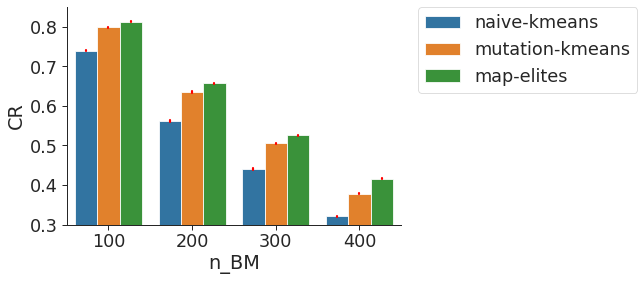

In [27]:
fpaths_1_methods = sorted(glob(os.path.join("results_1_self_comparison", "*", "*", "raw_CRs_*.csv")))
assert len(fpaths_1_methods) == 12

# aggregate csv data into 1 dataframe
df_1_methods = aggregate2df(fpaths_1_methods)
# store the dataframe into csv file
df2csv(df_1_methods, 
       ["n_BM", "Method"], ["CR"], os.path.join(plot_dir, "1_methods.csv"))
# plot
barplot("n_BM", "CR", df_1_methods, 
        "Method", ["naive-kmeans", "mutation-kmeans", "map-elites"],
        ylim=(0.3, 0.85))

In [23]:
fpaths_1_emulator = sorted(glob(os.path.join("results_1_self_comparison", "*", "raw_test_set_errors_*.csv")))
assert len(fpaths_1_emulator) == 4

# aggregate csv data into 1 dataframe
df_1_emulator = aggregate2df(fpaths_1_emulator)
# store the dataframe into csv file
df2csv(df_1_emulator, 
       ["n_BM"], ["Absolute Elem-wise Error", "Absolute CR Error"], 
       os.path.join(plot_dir, "1_emulator.csv"))

## 2. Sample Efficiency

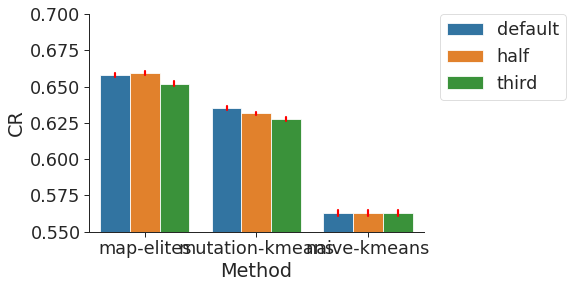

In [34]:
fpaths_2_methods = sorted(glob(os.path.join("results_2_sample_efficiency", "*", "*", "raw_CRs_*.csv")))
assert len(fpaths_2_methods) == 9

# aggregate csv data into 1 dataframe
df_2_methods = aggregate2df(fpaths_2_methods)
# store the dataframe into csv file
df2csv(df_2_methods,
       ["Collect Strategy", "Method"], ["CR"], os.path.join(plot_dir, "2_methods.csv"))
# plot
barplot("Method", "CR", df_2_methods,
        "Collect Strategy", ["default", "half", "third"],
        ylim=(0.55, 0.7))

In [37]:
fpaths_2_emulator = sorted(glob(os.path.join("results_2_sample_efficiency", "*", "raw_test_set_errors_*.csv")))
assert len(fpaths_2_emulator) == 3

# aggregate csv data into 1 dataframe
df_2_emulator = aggregate2df(fpaths_2_emulator)
# store the dataframe into csv file
df2csv(df_2_emulator, 
       ["Collect Strategy"], ["Absolute Elem-wise Error", "Absolute CR Error"], 
       os.path.join(plot_dir, "2_emulator.csv"))

## 3. Adaptive to Variable Entities

### 3.1 Variable Number of GUs

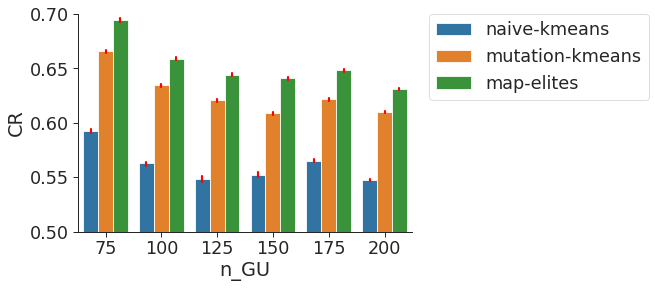

In [44]:
fpaths_3_methods_var_GU = sorted(glob(os.path.join("results_3_adaptive_to_variable_entities_var_GU", "*", "*", "raw_CRs_*.csv")))
assert len(fpaths_3_methods_var_GU) == 6 * 3

# aggregate csv data into 1 dataframe
df_3_methods_var_GU = aggregate2df(fpaths_3_methods_var_GU)
# store the dataframe into csv file
df2csv(df_3_methods_var_GU,
       ["n_GU", "Method"], ["CR"], os.path.join(plot_dir, "3_methods_var_GU.csv"))
# plot
barplot("n_GU", "CR", df_3_methods_var_GU, 
        "Method", ["naive-kmeans", "mutation-kmeans", "map-elites"],
        ylim=(0.5, 0.7))

In [46]:
fpaths_3_emulator_var_GU = sorted(glob(os.path.join("results_3_adaptive_to_variable_entities_var_GU", "*", "raw_emulator_metrics_*.csv")))
assert len(fpaths_3_emulator_var_GU) == 6

# aggregate csv data into 1 dataframe
df_3_emulator_var_GU = aggregate2df(fpaths_3_emulator_var_GU)
# store the dataframe into csv file
df2csv(df_3_emulator_var_GU,
       ["n_GU"], ["Absolute Elem-wise Error", "Absolute CR Error"], 
       os.path.join(plot_dir, "3_emulator_var_GU.csv"))

## 3.2 Variable Number of ABSs

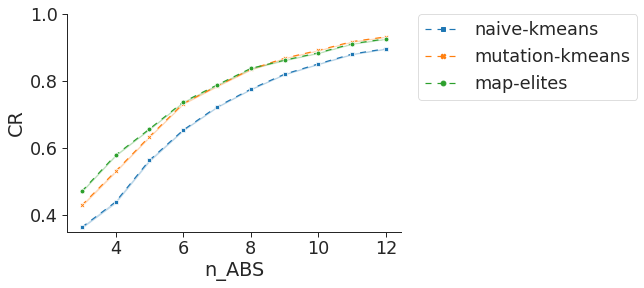

In [70]:
fpaths_3_methods_var_ABS = sorted(glob(os.path.join("results_3_adaptive_to_variable_entities_var_ABS", "*", "*", "raw_CRs_*.csv")))
assert len(fpaths_3_methods_var_ABS) == 10 * 3

# aggregate csv data into 1 dataframe
df_3_methods_var_ABS = aggregate2df(fpaths_3_methods_var_ABS)
# store the dataframe into csv file
df2csv(df_3_methods_var_ABS,
       ["n_ABS", "Method"], ["CR"], os.path.join(plot_dir, "3_methods_var_ABS.csv"))
# plot
lineplot("n_ABS", "CR", df_3_methods_var_ABS, 
         "Method", ["naive-kmeans", "mutation-kmeans", "map-elites"], 3,
         ylim=(0.35, 1.))

In [72]:
fpaths_3_emulator_var_ABS = sorted(glob(os.path.join("results_3_adaptive_to_variable_entities_var_ABS", "*", "raw_emulator_metrics_*.csv")))
assert len(fpaths_3_emulator_var_ABS) == 10

# aggregate csv data into 1 dataframe
df_3_emulator_var_ABS = aggregate2df(fpaths_3_emulator_var_ABS)
# store the dataframe into csv file
df2csv(df_3_emulator_var_ABS,
       ["n_ABS"], ["Absolute Elem-wise Error", "Absolute CR Error"], 
       os.path.join(plot_dir, "3_emulator_var_ABS.csv"))

## 4. Justification

In [73]:
fpaths_4 = sorted(glob(os.path.join("results_4_justification*", "*", "*", "processed_top_x_percentages_*.csv")))
assert len(fpaths_4) == 4 * 2

# aggregate csv data into 1 dataframe
df_4 = aggregate2df(fpaths_4)
# store the dataframe into csv file
df2csv(df_4,
       ["Explore:Serve", "Method"],  ["Top 1", "Top 2", "Top 3", "Top 5", "Top 10", "Top k"], 
       os.path.join(plot_dir, "4_top_x_percentages.csv"))

## 5. Compare with Baseline (currently lack baseline results)

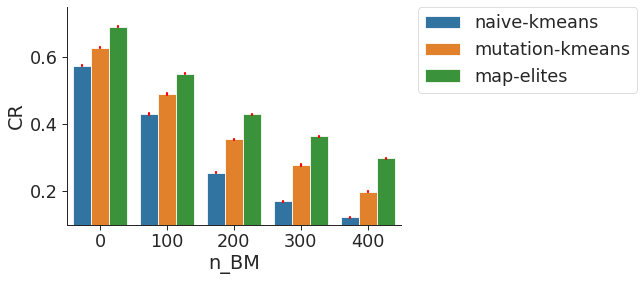

In [77]:
fpaths_5_methods = sorted(glob(os.path.join("results_5_mbp_vs_drl", "*", "*", "raw_CRs_*.csv")))
assert len(fpaths_5_methods) == 5 * 3

# aggregate csv data into 1 dataframe
df_5_methods = aggregate2df(fpaths_5_methods)
# store the dataframe into csv file
df2csv(df_5_methods, 
       ["n_BM", "Method"], ["CR"], os.path.join(plot_dir, "5_methods.csv"))
# plot
barplot("n_BM", "CR", df_5_methods, 
        "Method", ["naive-kmeans", "mutation-kmeans", "map-elites"],
        ylim=(0.1, 0.75))

In [80]:
fpaths_5_emulator = sorted(glob(os.path.join("results_5_mbp_vs_drl", "*", "raw_test_set_errors_*.csv")))
assert len(fpaths_5_emulator) == 5

# aggregate csv data into 1 dataframe
df_5_emulator = aggregate2df(fpaths_5_emulator)
# store the dataframe into csv file
df2csv(df_5_emulator, 
       ["n_BM"], ["Absolute Elem-wise Error", "Absolute CR Error"], 
       os.path.join(plot_dir, "5_emulator.csv"))

## 6. Demo

In [92]:
def render_demo(entities_status, fig_path=None,
                world_len=1000., K=32, granularity=1000./32,
                hmin=30, hmax=90, offset=20):
    
    # setup canvas
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_aspect('equal', adjustable='box')
    
    # plot BMs
    y, x = np.meshgrid(
        np.linspace(0, world_len, K+1), np.linspace(0, world_len, K+1))
    z = np.zeros((K, K))
    for _bm in entities_status["BMs"]:
        i, j = np.clip(_bm.pos[:2] / granularity, 0, K-1).astype(np.int32)
        z[i, j] = _bm.pos[-1]
    c = ax.pcolormesh(x, y, z, cmap="Greys", vmin=hmin, vmax=hmax)
    ax.axis([-offset, world_len+offset, -offset, world_len+offset])
    fig.colorbar(c, ax=ax)
    
    # plot ABSs
    ABS_locs = []
    for _abs in entities_status["ABSs"]:
        ABS_locs.append(_abs.pos[:-1])
        NLoS_R_circle = plt.Circle(_abs.pos[:-1], _abs.R_2D_NLoS, ec='g', fill=False, ls=':', lw=2.)
        LoS_R_circle  = plt.Circle(_abs.pos[:-1], _abs.R_2D_LoS, ec='g', fill=False, ls=':', lw=2.)
        ax.add_patch(NLoS_R_circle)
        ax.add_patch(LoS_R_circle)
    ax, ay = np.array(ABS_locs).T
    plt.scatter(ax, ay, color='b', s=50)
        
    # plot GUs
    UCGU_locs, CGU_locs = [], []
    for _gu in entities_status["GUs"]:
        if len(_gu.covered_by) > 0:
            CGU_locs.append(_gu.pos[:-1])
        else:
            UCGU_locs.append(_gu.pos[:-1])
    ux, uy = np.array(UCGU_locs).T
    cx, cy = np.array(CGU_locs).T
    plt.scatter(ux, uy, color='r', s=50, marker='^')
    plt.scatter(cx, cy, color='g', s=50, marker='^')
    
    plt.show()
    if fig_path is not None:
        plt.save(fig_path)
    
    pass

results_6_demo/BM100_ABS2_GU40_default/map-elites/entities_statuses.pkl


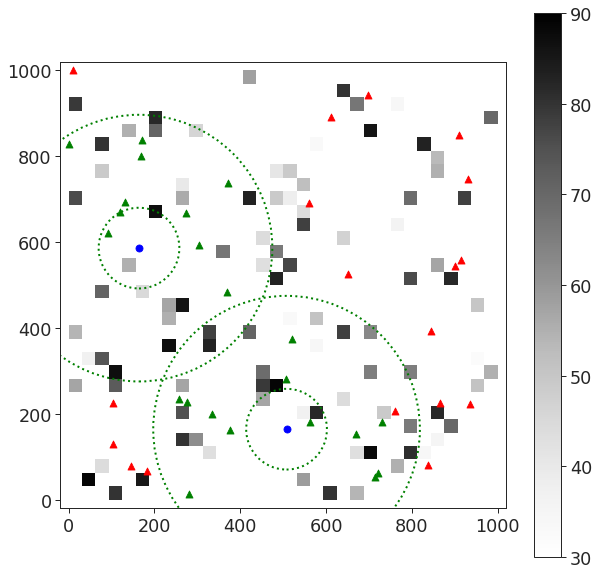

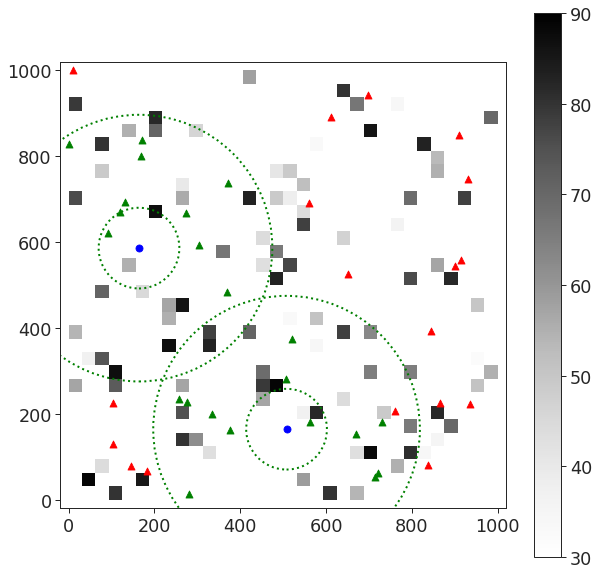

results_6_demo/BM100_ABS2_GU40_default/mutation-kmeans/entities_statuses.pkl


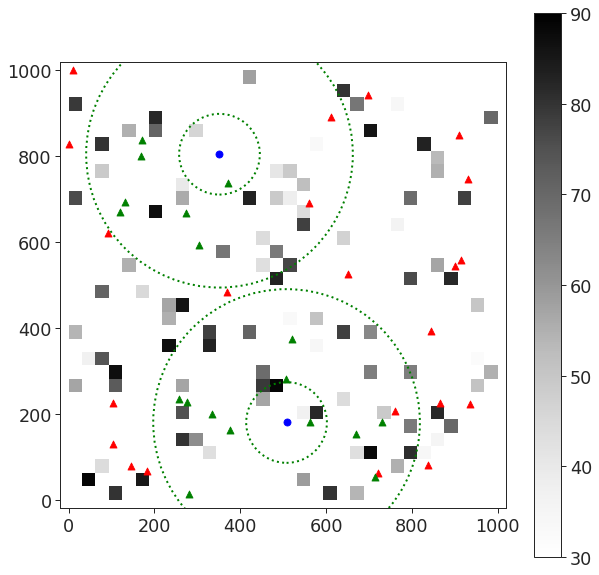

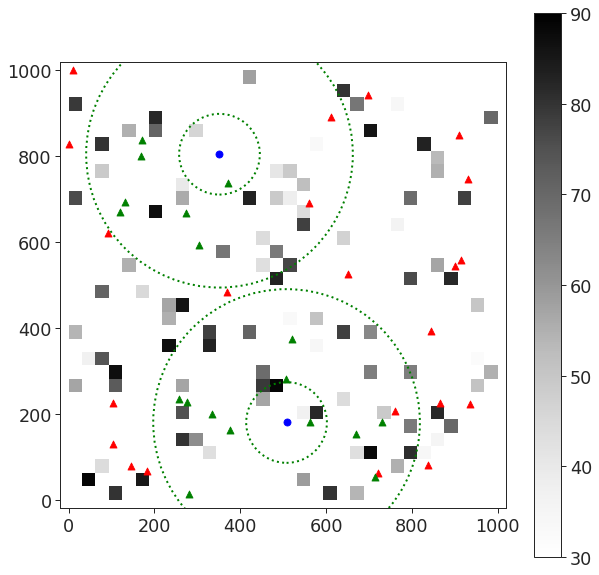

results_6_demo/BM100_ABS2_GU40_default/naive-kmeans/entities_statuses.pkl


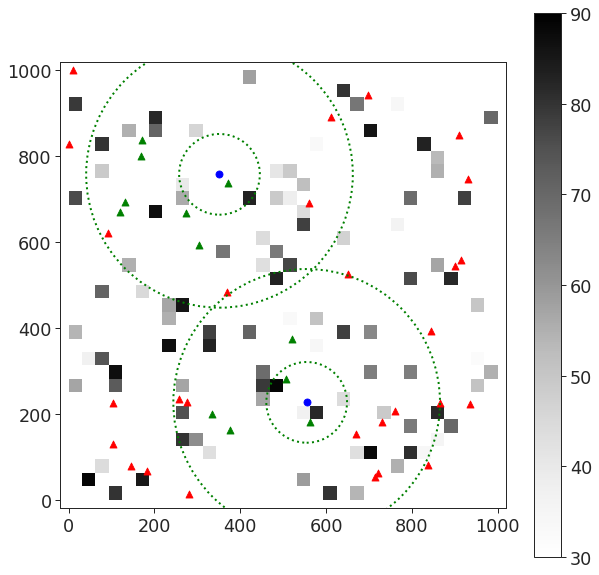

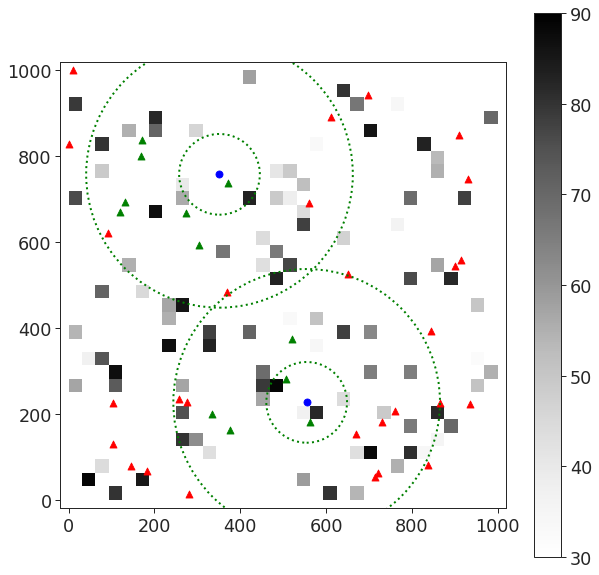

In [133]:
demo_pkl_fpaths = sorted(glob(os.path.join("results_6_demo", "*", "*", "*.pkl")))
assert len(demo_pkl_fpaths) == 3

for _fpath in demo_pkl_fpaths:
    print(_fpath)
    entities_statuses = pkl2dict(_fpath)
    for _es in entities_statuses:
        render_demo(_es)

## 7. Heatmaps

In [130]:
def render_heatmaps(bin_means, bin_stds, true_performances):
    
    print(f"bin_means {len(bin_means)}, bin_stds {len(bin_stds)}")
    
    y, x = np.meshgrid(bin_means, bin_stds)
    print(f"y.shape {y.shape}, x.shape {x.shape}")
    z = true_performances[:-1, :-1].T # discard last
    print(f"z.shape {z.shape}")
    zmin, zmax = 0, 1.
    
    fig, ax = plt.subplots()
    c = ax.pcolormesh(x, y, z, cmap="inferno", vmin=zmin, vmax=zmax)
    ax.axis([5, 25, 15, 55])
    fig.colorbar(c, ax=ax)
    
    plt.show()

results_7_heatmap/BM200_ABS5_GU100_default/map-elites/heatmaps_data.pkl
bin_means 102, bin_stds 81
y.shape (81, 102), x.shape (81, 102)
z.shape (80, 101)


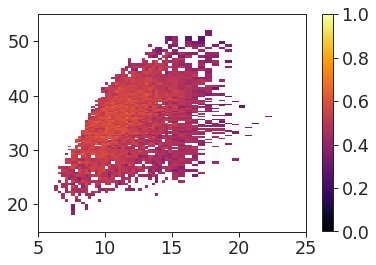

results_7_heatmap/BM200_ABS5_GU100_default/mutation-kmeans/heatmaps_data.pkl
bin_means 102, bin_stds 81
y.shape (81, 102), x.shape (81, 102)
z.shape (80, 101)


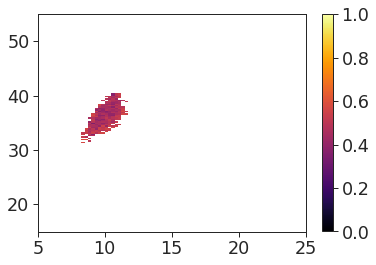

results_7_heatmap/BM200_ABS5_GU100_default/naive-kmeans/heatmaps_data.pkl
bin_means 102, bin_stds 81
y.shape (81, 102), x.shape (81, 102)
z.shape (80, 101)


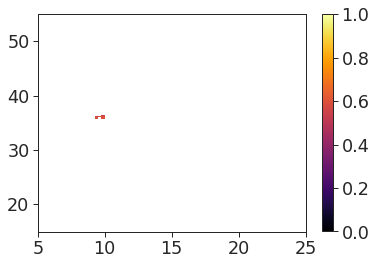

In [131]:
heatmaps_pkl_fpath = sorted(glob(os.path.join("results_7_heatmap", "*", "*", "*.pkl")))

for _fpath in heatmaps_pkl_fpath:
    print(_fpath)
    
    heatmap_dict = pkl2dict(_fpath)
    bin_means = heatmap_dict["bin_means"]
    bin_stds = heatmap_dict["bin_stds"]
    list_true_performances = heatmap_dict["list_true_performances"]

    for _tp in list_true_performances:
        render_heatmaps(bin_means, bin_stds, _tp)